In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import fashion_mnist
from keras.layers import AveragePooling2D, Conv2D, Dense, Flatten
from keras.models import Sequential
from keras.optimizers.legacy import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Fashion-MNIST is a dataset of images consisting of 10 different fashion categories, with 60,000 training images and 10,000 test images. Each image is a 28x28 grayscale image, and the goal is to correctly classify each image into its corresponding fashion category. The Fashion-MNIST dataset is often used as a drop-in replacement for the original MNIST dataset, as it is more challenging and better represents real-world computer vision tasks.


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index]]))

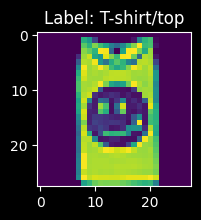

In [9]:
plot_sample(101)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
ann = Sequential(
    layers=[
        Flatten(input_shape=(28, 28), name="input_layer"),
        Dense(1600, activation="sigmoid", name="hidden_layer_1"),
        Dense(800, activation="sigmoid", name="hidden_layer_2"),
        Dense(400, activation="sigmoid", name="hidden_layer_3"),
        Dense(200, activation="sigmoid", name="hidden_layer_4"),
        Dense(100, activation="sigmoid", name="hidden_layer_5"),
        Dense(10, activation="softmax", name="output_layer"),
    ],
    name="ann",
)

2023-08-03 13:47:49.737277: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-03 13:47:49.737321: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-03 13:47:49.737333: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-03 13:47:49.737489: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-03 13:47:49.737958: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
ann.layers

In [13]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 1600)              1256000   
                                                                 
 hidden_layer_2 (Dense)      (None, 800)               1280800   
                                                                 
 hidden_layer_3 (Dense)      (None, 400)               320400    
                                                                 
 hidden_layer_4 (Dense)      (None, 200)               80200     
                                                                 
 hidden_layer_5 (Dense)      (None, 100)               20100     
                                                                 
 output_layer (Dense)        (None, 10)                1010    

In [14]:
optimizer = Adam()
ann.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [15]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/fashion-mnist_ann",
    monitor="val_accuracy",
    save_best_only=True,
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/fashion-mnist_ann_logs", histogram_freq=1, write_images=True
)
epochs = 10
ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[ann_checkpoint_callback, ann_tensorboard_callback],
)

Epoch 1/10


2023-08-03 13:47:50.710318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - ETA: 0s - loss: 0.7975 - accuracy: 0.6910

2023-08-03 13:48:23.167244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1688/1688 [==============================] - 35s 21ms/step - loss: 0.7975 - accuracy: 0.6910 - val_loss: 0.5188 - val_accuracy: 0.8255
Epoch 2/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.4439 - accuracy: 0.8443 - val_loss: 0.4042 - val_accuracy: 0.8518
Epoch 3/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.3807 - accuracy: 0.8639 - val_loss: 0.3751 - val_accuracy: 0.8632
Epoch 4/10
1688/1688 [==============================] - 43s 26ms/step - loss: 0.3444 - accuracy: 0.8768 - val_loss: 0.3520 - val_accuracy: 0.8732
Epoch 5/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.3214 - accuracy: 0.8847 - val_loss: 0.3411 - val_accuracy: 0.8737
Epoch 6/10
1688/1688 [==============================] - 41s 24ms/step - loss: 0.3018 - accuracy: 0.8902 - val_loss: 0.3364 - val_accuracy: 0.8807
Epoch 7/10
1688/1688 [==============================] - 55s 33ms/step - loss: 0.2868 - accuracy: 0.8936 - val_loss: 0.3303 - val_accura

In [16]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["accuracy"]
ann_val_acc = ann_history.history["val_accuracy"]
ann_val_loss = ann_history.history["val_loss"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 0.3652049615979195
Validation loss: 0.3632020890712738
0.865820 Training accuracy with a standard deviation of 0.061160
0.870317 Validation accuracy with a standard deviation of 0.018142


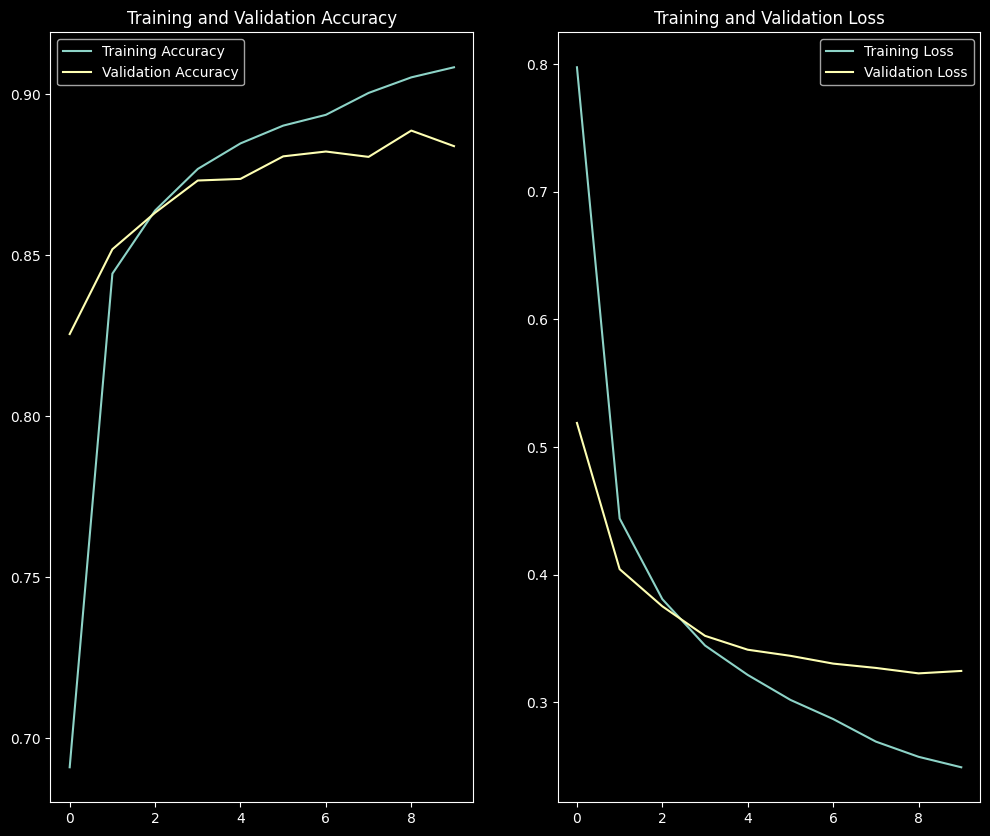

In [17]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.savefig("../Images/fashion-mnist_ann_acc_loss.png", bbox_inches="tight")

In [18]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 [==============================] - 5s 15ms/step - loss: 0.3494 - accuracy: 0.8764
Test loss: 0.34935635328292847
Test accuracy: 0.8763999938964844


In [19]:
y_pred = ann.predict(X_test)

  1/313 [..............................] - ETA: 1:52

2023-08-03 13:55:19.934194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step


In [20]:
cnn = Sequential(
    layers=[
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation="relu",
            input_shape=(28, 28, 1),
            name="conv_layer_1",
        ),
        AveragePooling2D((2, 2), name="pooling_layer_1"),
        Conv2D(filters=64, kernel_size=(3, 3), activation="relu", name="conv_layer_2"),
        AveragePooling2D((2, 2), name="pooling_layer_2"),
        Flatten(name="flatten_layer"),
        Dense(1600, activation="sigmoid", name="dense_layer_1"),
        Dense(800, activation="sigmoid", name="dense_layer_2"),
        Dense(400, activation="sigmoid", name="dense_layer_3"),
        Dense(200, activation="sigmoid", name="dense_layer_4"),
        Dense(100, activation="sigmoid", name="dense_layer_5"),
        Dense(10, activation="softmax", name="final_layer"),
    ],
    name="cnn",
)

In [21]:
cnn.layers

In [22]:
cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_layer_1 (AveragePo  (None, 13, 13, 32)        0         
 oling2D)                                                        
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_layer_2 (AveragePo  (None, 5, 5, 64)          0         
 oling2D)                                                        
                                                                 
 flatten_layer (Flatten)     (None, 1600)              0         
                                                                 
 dense_layer_1 (Dense)       (None, 1600)              2561600 

In [23]:
cnn.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [24]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/fashion-mnist_cnn",
    monitor="val_accuracy",
    save_best_only=True,
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/fashion-mnist_cnn_logs", histogram_freq=1, write_images=True
)
cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[cnn_checkpoint_callback, cnn_tensorboard_callback],
)

Epoch 1/10


2023-08-03 13:55:25.509569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - ETA: 0s - loss: 2.0174 - accuracy: 0.1691

2023-08-03 13:56:17.830483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 60s 34ms/step - loss: 2.0174 - accuracy: 0.1691 - val_loss: 1.4709 - val_accuracy: 0.2927
Epoch 2/10
1688/1688 [==============================] - 61s 36ms/step - loss: 1.1343 - accuracy: 0.4681 - val_loss: 0.9613 - val_accuracy: 0.5560
Epoch 3/10
1688/1688 [==============================] - 60s 35ms/step - loss: 0.9459 - accuracy: 0.5475 - val_loss: 0.9187 - val_accuracy: 0.5528
Epoch 4/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.8975 - accuracy: 0.5691 - val_loss: 0.8576 - val_accuracy: 0.5797
Epoch 5/10
1688/1688 [==============================] - 53s 31ms/step - loss: 0.6829 - accuracy: 0.7287 - val_loss: 0.5699 - val_accuracy: 0.7848
Epoch 6/10
1688/1688 [==============================] - 53s 31ms/step - loss: 0.5767 - accuracy: 0.7849 - val_loss: 0.5697 - val_accuracy: 0.7778
Epoch 7/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.5520 - accuracy: 0.7918 - val_loss: 0.5574 - val_accura

In [25]:
cnn_train_acc = cnn_history.history["accuracy"]
cnn_val_acc = cnn_history.history["val_accuracy"]
cnn_train_loss = cnn_history.history["loss"]
cnn_val_loss = cnn_history.history["val_loss"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 0.8359558910131455
Validation loss: 0.7420133084058762
0.649383 Training accuracy with a standard deviation of 0.201239
0.677583 Validation accuracy with a standard deviation of 0.168409


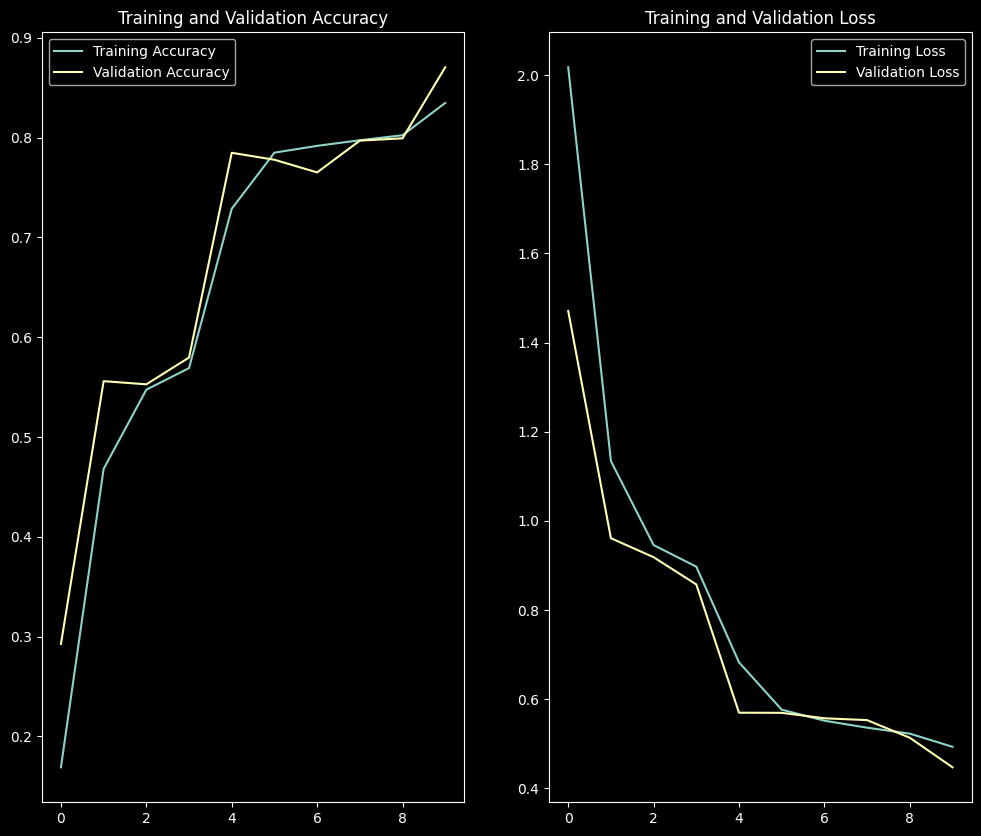

In [26]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.savefig("../Images/fashion-mnist_cnn_acc_loss.png", bbox_inches="tight")

In [27]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.4649 - accuracy: 0.8673
Test loss: 0.46493929624557495
Test accuracy: 0.8672999739646912


In [28]:
y_pred = cnn.predict(X_test)

 14/313 [>.............................] - ETA: 1s 

2023-08-03 14:04:41.800190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step
